Code taken from https://github.com/LauraGomezNavarro/OceanParcels_Lyapunov

In [1]:
import time
print(time.ctime(time.time()))

Fri Mar  8 14:22:25 2024


Import packages

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as features
from matplotlib import colors
import sys
from tqdm import tqdm

Loading data

In [3]:
home_folder = '/nethome/manra003/Lagrangian_diags/'
output_folder = home_folder + 'outputs/ftle/'

<h4> Td: Time in days selected to get the location of particles after release

In [4]:
Td=15

In [5]:
sys.path.insert(0, home_folder + "Diagnostics/Functions/")
import FTLE

In [6]:

# ds = xr.open_dataset(home_folder + 'Simulations/toy_data_01.nc')
ds = xr.open_zarr(home_folder + 'Simulations/toy_data_02.zarr')
ds

<xarray.Dataset>
Dimensions:     (traj: 84100, obs: 121)
Dimensions without coordinates: traj, obs
Data variables:
    U           (traj, obs) float32 dask.array<chunksize=(10513, 16), meta=np.ndarray>
    V           (traj, obs) float32 dask.array<chunksize=(10513, 16), meta=np.ndarray>
    lat         (traj, obs) float32 dask.array<chunksize=(10513, 16), meta=np.ndarray>
    lon         (traj, obs) float32 dask.array<chunksize=(10513, 16), meta=np.ndarray>
    time        (traj, obs) datetime64[ns] dask.array<chunksize=(10513, 16), meta=np.ndarray>
    trajectory  (traj, obs) float64 dask.array<chunksize=(10513, 16), meta=np.ndarray>
    z           (traj, obs) float32 dask.array<chunksize=(10513, 16), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.2-3-g366d4707

Get release particles from the meshgrid for release particles 

In [7]:
# hard coded here, as its not possible to tell from the parcels output files itself.
coords0, coords1 =  290, 290 # 12, 12  

# initial position
x0 = np.reshape(ds['lon'][:,0].values, (coords0, coords1))
y0 = np.reshape(ds['lat'][:,0].values, (coords0, coords1))

# final position
x1 = np.reshape(ds['lon'][:,-1].values, (coords0, coords1))
y1 = np.reshape(ds['lat'][:,-1].values, (coords0, coords1))

In [8]:
H = x0.shape[0]
L = x1.shape[1]
FTLE_f = np.ones_like(np.asarray(x0))
FTLE_f[:,:] = np.NaN

In [10]:
ftle_array = FTLE.compute_ftle(x0, y0, x1, y1, Td)

-0.0075099766 0.41894987


Plot FTLE values at the release locations

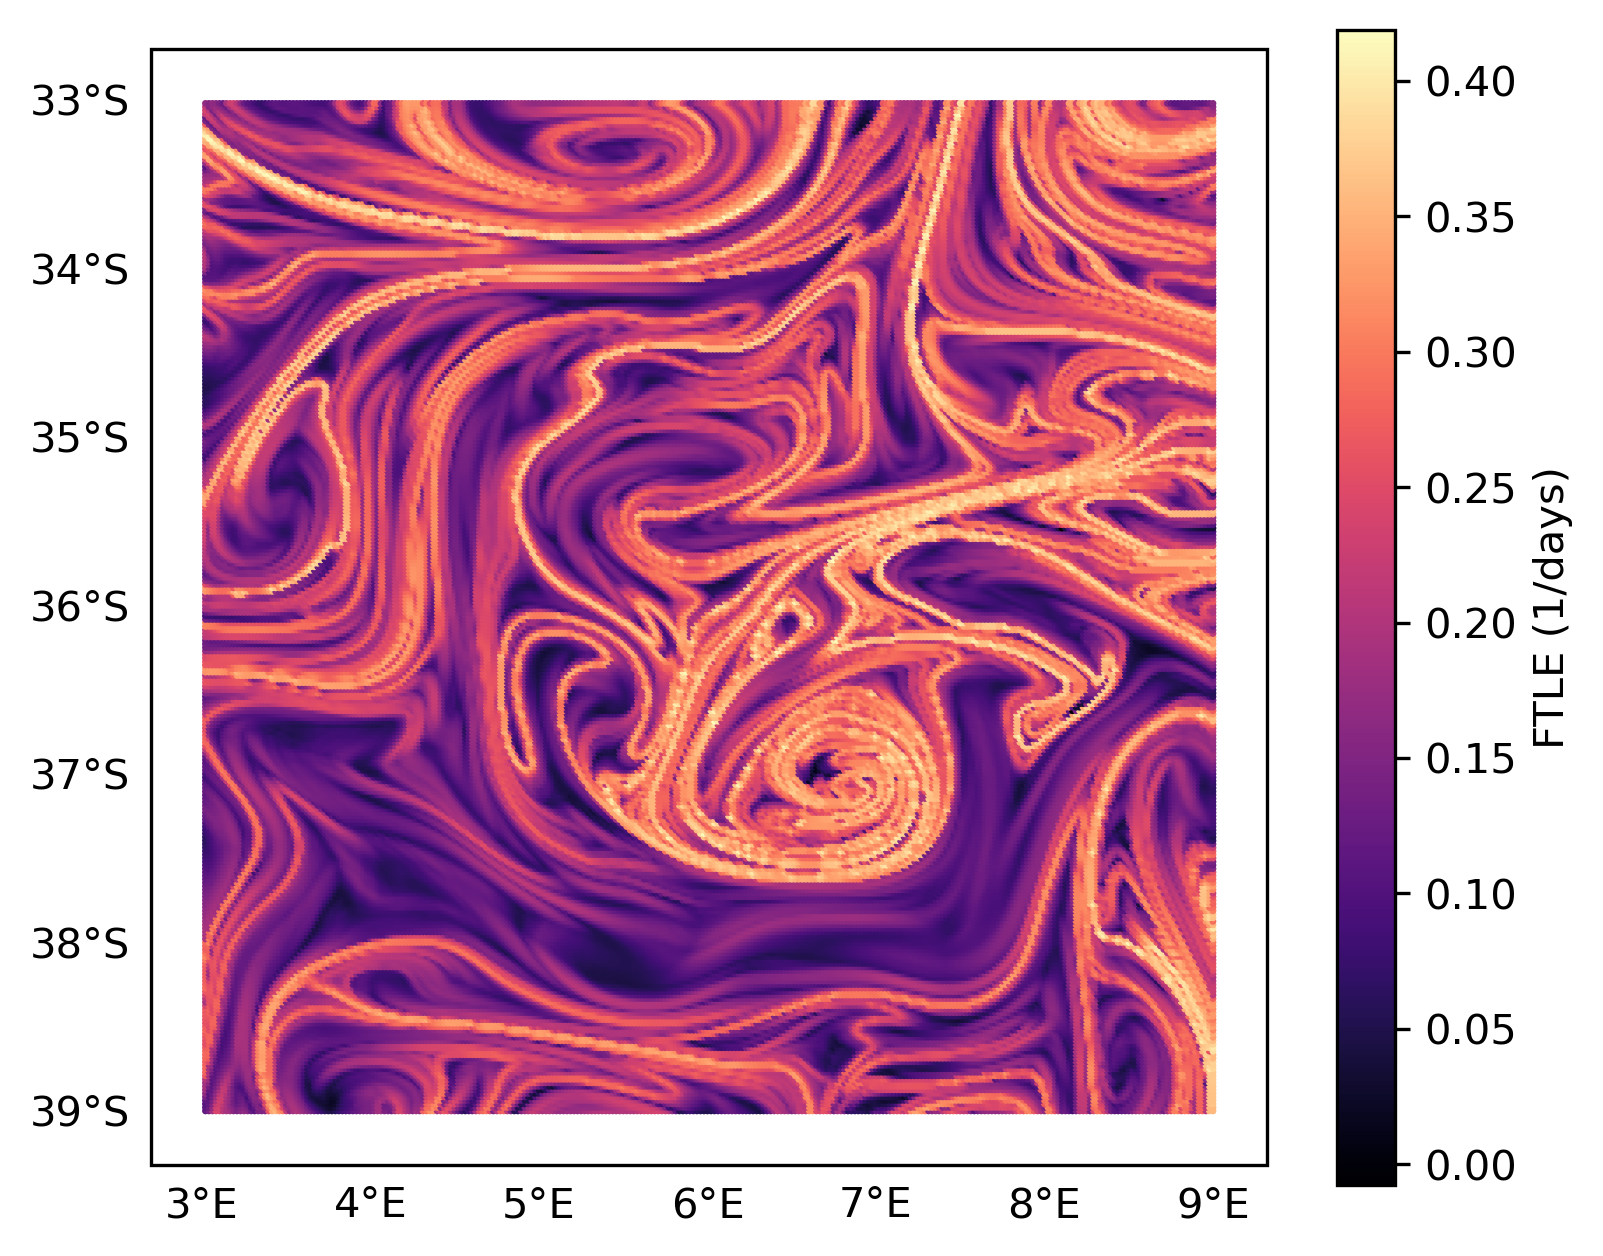

In [24]:
# ftle_array = FTLE.compute_ftle(x0,y0,x1,y1, Td)
fig = plt.figure(figsize=(6,5), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
ax.add_feature(features.LAND)
ax.add_feature(features.COASTLINE)
# ax.set_xlim([0, 20])
# ax.set_ylim([-45, -28])

plt.scatter(ds['lon'][:,0], ds['lat'][:,0], c=ftle_array, cmap='magma', s=0.4)

cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")


<h3> Land mass in the release grid</h3>
If the region you are interested in also has a land mass, you can do the following:

1. Create a regular array of particle locations over the whole area (land and water).
2. Use the land mask from the ocean model data to create a boolean matrix corresponding to the released particles and extract the ocean only particles.
3. After the simulation, use the boolean mask array to map the released particles initial (and final) locations to an array of the boolean matrix shape. Non-ocean particles are set to NAN.
